## San Francisco Housing Cost Analysis

In [92]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [93]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [94]:
# Read the census data into a Pandas DataFrame
sfo_data = pd.read_csv('sfo_neighborhoods_census_data.csv')
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


## Housing units per year 

In [95]:
# Read the census data 
sfo_data = pd.read_csv('sfo_neighborhoods_census_data.csv')

# group data by year for yearly analysis
sfo_data = sfo_data.groupby('year').mean()
sfo_data.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0


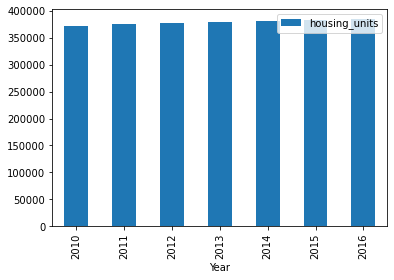

In [96]:
# Use the Pandas plot function to plot the average housing units per year.
import pandas as pd
import matplotlib.pyplot as plt
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data = {'Year': [2010,2011,2012,2013,2014,2015,2016],
            'housing_units': [372560.0,374507.0,376454.0,378401.0,380348.0,382295.0,384242.0]
           }
df = pd.DataFrame(sfo_data,columns=['Year','housing_units'])
df.plot(x ='Year', y='housing_units', kind = 'bar')
plt.show()

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [97]:
# Calculate the average sale price per square foot and average gross rent
sfo_data = pd.read_csv("sfo_neighborhoods_census_data.csv")

In [98]:
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [99]:
sfo_data = sfo_data.drop(["neighborhood", "housing_units"], axis = 1)

In [100]:
sfo_data

,year,sale_price_sqr_foot,gross_rent
0,2010,291.182945,1239
1,2010,267.932583,1239
2,2010,170.098665,1239
3,2010,347.394919,1239
4,2010,319.027623,1239
...,...,...,...
392,2016,903.049771,4390
393,2016,970.085470,4390
394,2016,552.602567,4390
395,2016,328.319007,4390


In [101]:
sfo_data.set_index('year', inplace=True)
sfo_data

,sale_price_sqr_foot,gross_rent
year,,
2010,291.182945,1239
2010,267.932583,1239
2010,170.098665,1239
2010,347.394919,1239
2010,319.027623,1239
...,...,...
2016,903.049771,4390
2016,970.085470,4390
2016,552.602567,4390


In [102]:
# Calculate the average sale price per square foot and average gross rent
sfo_data = sfo_data.groupby("year").mean()
sfo_data

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


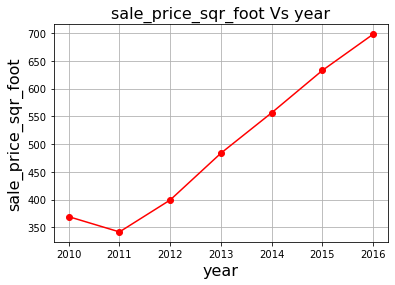

In [103]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
import pandas as pd
import matplotlib.pyplot as plt
   
Data = {'year': [2010,2011,2012,2013,2014,2015,2016],
        'sale_price_sqr_foot': [369.344353,341.903429,399.389968,483.600304,556.277273,632.540352,697.643709]
       }
  
df = pd.DataFrame(Data,columns=['year','sale_price_sqr_foot'])
  
plt.plot(df['year'], df['sale_price_sqr_foot'], color='red', marker='o')
plt.title('sale_price_sqr_foot Vs year', fontsize=16)
plt.xlabel('year', fontsize=16)
plt.ylabel('sale_price_sqr_foot', fontsize=16)
plt.grid(True)
plt.show()

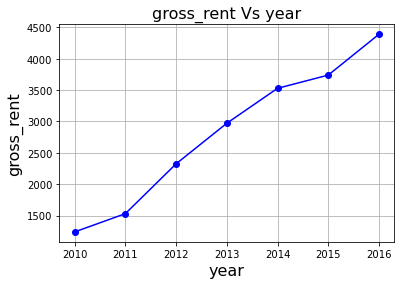

In [104]:
# Line chart for average montly rent
Data = {'year': [2010,2011,2012,2013,2014,2015,2016],
        'gross_rent': [1239,1530,2324,2971,3528,3739,4390]
       }
  
df = pd.DataFrame(Data,columns=['year','gross_rent'])
  
plt.plot(df['year'], df['gross_rent'], color='blue', marker='o')
plt.title('gross_rent Vs year', fontsize=16)
plt.xlabel('year', fontsize=16)
plt.ylabel('gross_rent', fontsize=16)
plt.grid(True)
plt.show()

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [105]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data = pd.read_csv('sfo_neighborhoods_census_data.csv')
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [106]:
sfo_data.set_index("year",inplace=True)
sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [107]:
sfo_data = sfo_data.drop(["neighborhood", "housing_units"], axis = 1)
sfo_data.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,291.182945,1239
2010,267.932583,1239
2010,170.098665,1239
2010,347.394919,1239
2010,319.027623,1239
2010,418.172493,1239
2010,369.359338,1239
2010,569.379968,1239
2010,165.645730,1239


In [108]:
# find average price_sqr_foot and and average monthly_rent 
sfo_data = sfo_data.groupby("year").mean()
sfo_data

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


In [111]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_data.hvplot.line(x='year', y='sale_price_sqr_foot',)

:Curve   [year]   (sale_price_sqr_foot)

In [112]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_data.hvplot.line(x='year', y='gross_rent')

:Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [20]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_data = pd.read_csv('sfo_neighborhoods_census_data.csv')
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [21]:
sfo_data = sfo_data.groupby("neighborhood").mean()
sfo_data

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


In [22]:
sfo_data.sort_values(by=['sale_price_sqr_foot'], inplace=True)
sfo_data

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Silver Terrace,2014.00,170.292549,380348.00,3528.000000
Hunters Point,2012.50,170.624920,377427.50,2489.000000
Bayview,2012.00,204.588623,376454.00,2318.400000
Outer Mission,2013.50,242.370952,379374.50,2995.750000
Visitacion Valley,2014.50,301.466180,381321.50,3657.000000
...,...,...,...,...
Westwood Park,2015.00,687.087575,382295.00,3959.000000
Pacific Heights,2013.00,689.555817,378401.00,2817.285714
Miraloma Park,2011.75,779.810842,375967.25,2155.250000


In [23]:
# Pick 10 the most expensive neighborhood
sfo_data.tail(10)

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
South Beach,2011.666667,650.124479,375805.00,2099.000000
Potrero Hill,2013.000000,662.013613,378401.00,2817.285714
Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
Westwood Park,2015.000000,687.087575,382295.00,3959.000000
Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
Merced Heights,2014.000000,788.844818,380348.00,3414.000000


In [24]:
sfo_data.drop('year', axis=1, inplace=True)
sfo_data.tail(10)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
South Beach,650.124479,375805.00,2099.000000
Potrero Hill,662.013613,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Telegraph Hill,676.506578,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Pacific Heights,689.555817,378401.00,2817.285714
Miraloma Park,779.810842,375967.25,2155.250000
Merced Heights,788.844818,380348.00,3414.000000


In [25]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_data.tail(10).hvplot.bar(x='neighborhood', y='sale_price_sqr_foot',rot=90).opts(title="top 10 most expensive neighborhoods")

:Bars   [neighborhood]   (sale_price_sqr_foot)

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [26]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data = pd.read_csv("sfo_neighborhoods_census_data.csv")
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [27]:
sfo_data.set_index("year", inplace=True)
sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [28]:
sfo_data = sfo_data.drop(["neighborhood", "housing_units"], axis = 1)
sfo_data.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,291.182945,1239
2010,267.932583,1239
2010,170.098665,1239
2010,347.394919,1239
2010,319.027623,1239
2010,418.172493,1239
2010,369.359338,1239
2010,569.379968,1239
2010,165.645730,1239


In [29]:
sfo_data = sfo_data.groupby("year").mean()
sfo_data.head(10)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


In [31]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_data.hvplot.line(x='year', y='sale_price_sqr_foot') + sfo_data.hvplot.line(x='year', y='gross_rent')

:Layout
   .Curve.I  :Curve   [year]   (sale_price_sqr_foot)
   .Curve.II :Curve   [year]   (gross_rent)

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [32]:
# Load neighborhoods coordinates data
neighborhoods_data = pd.read_csv("neighborhoods_coordinates.csv")
neighborhoods_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [33]:
neighborhoods_data.set_index('Neighborhood', inplace=True)
neighborhoods_data.head(5)

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [34]:
# Load data for sfo neighborhoods
sfo_data = pd.read_csv("sfo_neighborhoods_census_data.csv")
sfo_data.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [35]:
sfo_data.drop('year', axis = 1, inplace=True)
sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,291.182945,372560,1239
1,Anza Vista,267.932583,372560,1239
2,Bayview,170.098665,372560,1239
3,Buena Vista Park,347.394919,372560,1239
4,Central Richmond,319.027623,372560,1239
5,Central Sunset,418.172493,372560,1239
6,Corona Heights,369.359338,372560,1239
7,Cow Hollow,569.379968,372560,1239
8,Croker Amazon,165.645730,372560,1239
9,Diamond Heights,456.930822,372560,1239


In [36]:
# Calculate the mean values for each neighborhood
sfo_data = sfo_data.groupby('neighborhood').mean()
sfo_data.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [37]:
sfo_data.reset_index()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


In [38]:
# Join the average values with the neighborhood locations
combined_df = pd.concat([neighborhoods_data.head(), sfo_data.head()], axis=1,)
combined_df.head()

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN


In [39]:
combined_df.reset_index()

,index,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN
5,Bernal Heights,NaN,NaN,576.746488,379374.5,3080.333333


In [40]:
combined_df.dropna()

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [49]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

In [50]:
# Create a scatter mapbox to analyze neighborhood info
combined_df.head()
data_to_plot = combined_df.head()[["sale_price_sqr_foot","Lat", "Lon", "gross_rent",]]

In [ ]:
# Plot data using scatter_mapbox
map = px.scatter_mapbox(
    lat="latitude",
    lon="longitude",
    color="gross_rent",
    size="sale_price_sqr_foot",
)
# Display the map
map.show()

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [44]:
# Fetch the data from all expensive neighborhoods per year.
sfo_data = pd.read_csv('sfo_neighborhoods_census_data.csv')
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [55]:
sfo_data = sfo_data.groupby('neighborhood').mean()
sfo_data

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


In [58]:
sfo_data.sort_values(by=['sale_price_sqr_foot'], inplace=True)
sfo_data

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Silver Terrace,2014.00,170.292549,380348.00,3528.000000
Hunters Point,2012.50,170.624920,377427.50,2489.000000
Bayview,2012.00,204.588623,376454.00,2318.400000
Outer Mission,2013.50,242.370952,379374.50,2995.750000
Visitacion Valley,2014.50,301.466180,381321.50,3657.000000
...,...,...,...,...
Westwood Park,2015.00,687.087575,382295.00,3959.000000
Pacific Heights,2013.00,689.555817,378401.00,2817.285714
Miraloma Park,2011.75,779.810842,375967.25,2155.250000


In [76]:
sfo_data.tail(10).reset_index()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,South Beach,650.124479,375805.00,2099.000000
1,Potrero Hill,662.013613,378401.00,2817.285714
2,Cow Hollow,665.964042,378401.00,2817.285714
3,Presidio Heights,675.350212,378401.00,2817.285714
4,Telegraph Hill,676.506578,378401.00,2817.285714
5,Westwood Park,687.087575,382295.00,3959.000000
6,Pacific Heights,689.555817,378401.00,2817.285714
7,Miraloma Park,779.810842,375967.25,2155.250000
8,Merced Heights,788.844818,380348.00,3414.000000
9,Union Square District,903.993258,377427.50,2555.166667


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


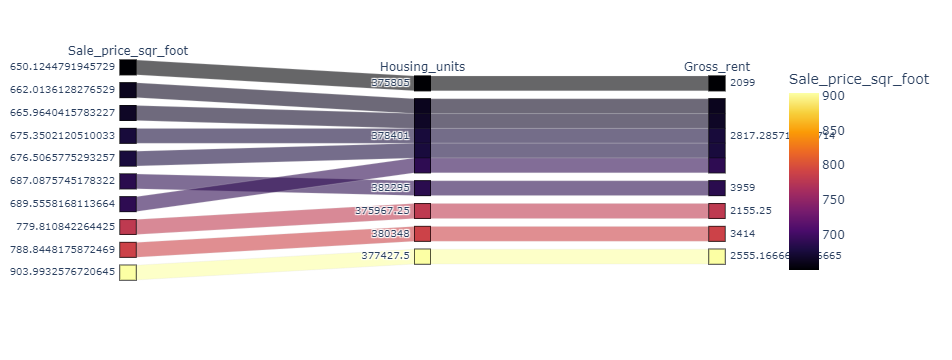

In [91]:
px.parallel_categories(
    sfo_data.tail(10),
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale_price_sqr_foot",
        "housing_units": "Housing_units",
        "gross_rent": "Gross_rent",
    },
)


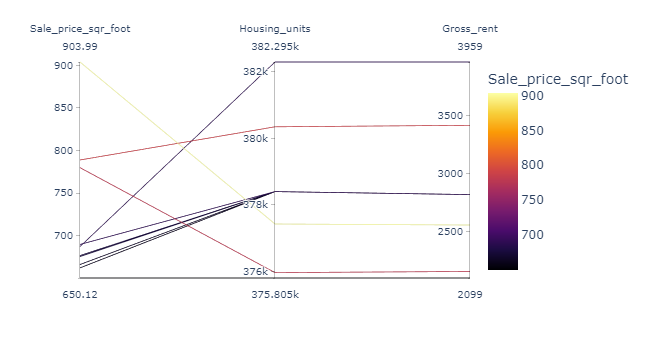

In [87]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    sfo_data.tail(10),
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale_price_sqr_foot",
        "housing_units": "Housing_units",
        "gross_rent": "Gross_rent",
    },
)